In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
import splitfolders

In [4]:
imge_size=256
btch_size=32
channels=3
train_datagen=ImageDataGenerator(rescale=1./255, horizontal_flip=True
                  , rotation_range=10
                  )
train_generator=train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(imge_size,imge_size),
    batch_size=btch_size,
    class_mode='sparse',
)

Found 1506 images belonging to 3 classes.


In [6]:
for image_batch , label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.6151812  0.5642008  0.6034165 ]
  [0.49985144 0.44887102 0.4880867 ]
  [0.57252043 0.52154005 0.5607557 ]
  ...
  [0.7149534  0.69926715 0.7541691 ]
  [0.7146891  0.6990028  0.75390476]
  [0.7144246  0.69873834 0.7536403 ]]

 [[0.6083065  0.5573261  0.5965418 ]
  [0.50831264 0.45733225 0.49654797]
  [0.5669677  0.51598734 0.555203  ]
  ...
  [0.70567137 0.6899851  0.74488705]
  [0.7048781  0.6891918  0.7440938 ]
  [0.7040849  0.6883986  0.74330056]]

 [[0.6014317  0.55045134 0.589667  ]
  [0.5167739  0.46579346 0.5050092 ]
  [0.5614151  0.5104347  0.5496504 ]
  ...
  [0.6966092  0.6809229  0.7358249 ]
  [0.6960804  0.6803941  0.7352961 ]
  [0.6955515  0.67986524 0.7347672 ]]

 ...

 [[0.537049   0.48606858 0.55273527]
  [0.5367845  0.48580417 0.5524708 ]
  [0.5365202  0.48553976 0.55220646]
  ...
  [0.74649245 0.7308062  0.7857081 ]
  [0.73866713 0.72298086 0.7778828 ]
  [0.7308419  0.7151556  0.77005756]]

 [[0.53648585 0.48550543 0.5521721 ]
  [0.5407164  0.48973605 0.5564027 ]


In [7]:
validation_datagen=ImageDataGenerator(rescale=1./255, horizontal_flip=True
                  , rotation_range=10
                  )
validation_generator=validation_datagen.flow_from_directory(
    'dataset/val',
    target_size=(imge_size,imge_size),
    batch_size=btch_size,
    class_mode='sparse',
)

Found 430 images belonging to 3 classes.


In [8]:
test_datagen=ImageDataGenerator(rescale=1./255, horizontal_flip=True
                  , rotation_range=10
                  )
test_generator=test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(imge_size,imge_size),
    batch_size=btch_size,
    class_mode='sparse',
)

Found 216 images belonging to 3 classes.


In [13]:
input_shape=(imge_size,imge_size,channels)
n_classes=3
model=models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
    
])


In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 30, 30, 64)      

In [15]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy']       
             )

In [16]:
1506/32

47.0625

In [18]:
430/32

13.4375

In [21]:
epochs=20
history=model.fit(train_generator,
         steps_per_epoch=47,
          batch_size=btch_size,
          verbose=1,
          validation_data=validation_generator,
          validation_steps=13,
          epochs=epochs 
         )

Epoch 1/20
47/47 [==============================] - 127s 3s/step - loss: 0.9165 - accuracy: 0.4749 - val_loss: 0.8605 - val_accuracy: 0.4784
Epoch 2/20
47/47 [==============================] - 88s 2s/step - loss: 0.8208 - accuracy: 0.6031 - val_loss: 0.8279 - val_accuracy: 0.6082
Epoch 3/20
47/47 [==============================] - 88s 2s/step - loss: 0.6629 - accuracy: 0.7123 - val_loss: 0.6616 - val_accuracy: 0.7212
Epoch 4/20
47/47 [==============================] - 90s 2s/step - loss: 0.4841 - accuracy: 0.7917 - val_loss: 0.3795 - val_accuracy: 0.8413
Epoch 5/20
47/47 [==============================] - 88s 2s/step - loss: 0.3244 - accuracy: 0.8799 - val_loss: 0.2790 - val_accuracy: 0.9014
Epoch 6/20
47/47 [==============================] - 88s 2s/step - loss: 0.2801 - accuracy: 0.8881 - val_loss: 0.4055 - val_accuracy: 0.8197
Epoch 7/20
47/47 [==============================] - 88s 2s/step - loss: 0.3110 - accuracy: 0.8860 - val_loss: 0.2883 - val_accuracy: 0.8990
Epoch 8/20
47/47 [=

In [22]:
scores=model.evaluate(test_generator)

7/7 [==============================] - 5s 744ms/step - loss: 0.1378 - accuracy: 0.9583


In [23]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

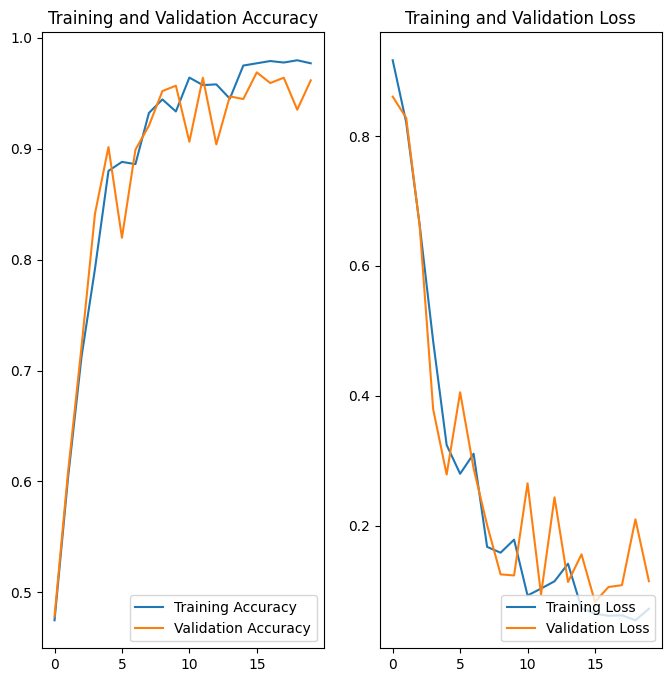

In [27]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs),acc,label='Training Accuracy')
plt.plot(range(epochs),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(epochs),loss,label='Training Loss')
plt.plot(range(epochs),val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')


In [33]:
class_names=['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

first image to predict
first image's actual label: Potato___Early_blight
predicted label:  Potato___Early_blight


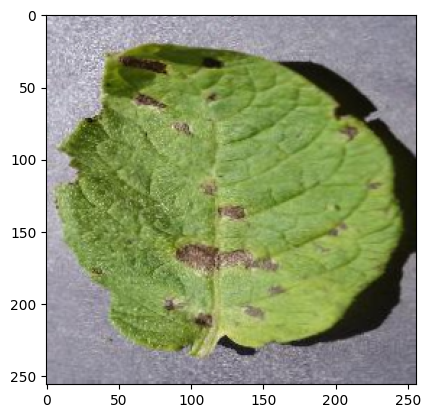

In [43]:
import numpy as np
for images_batch, labels_batch in test_generator:
    first_image=images_batch[0]
    first_label=int(labels_batch[0])
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])
    batch_pred= model.predict(images_batch)
    print("predicted label: ",class_names[np.argmax(batch_pred[0])])
    break

def

In [54]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(img)
    img_array=tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

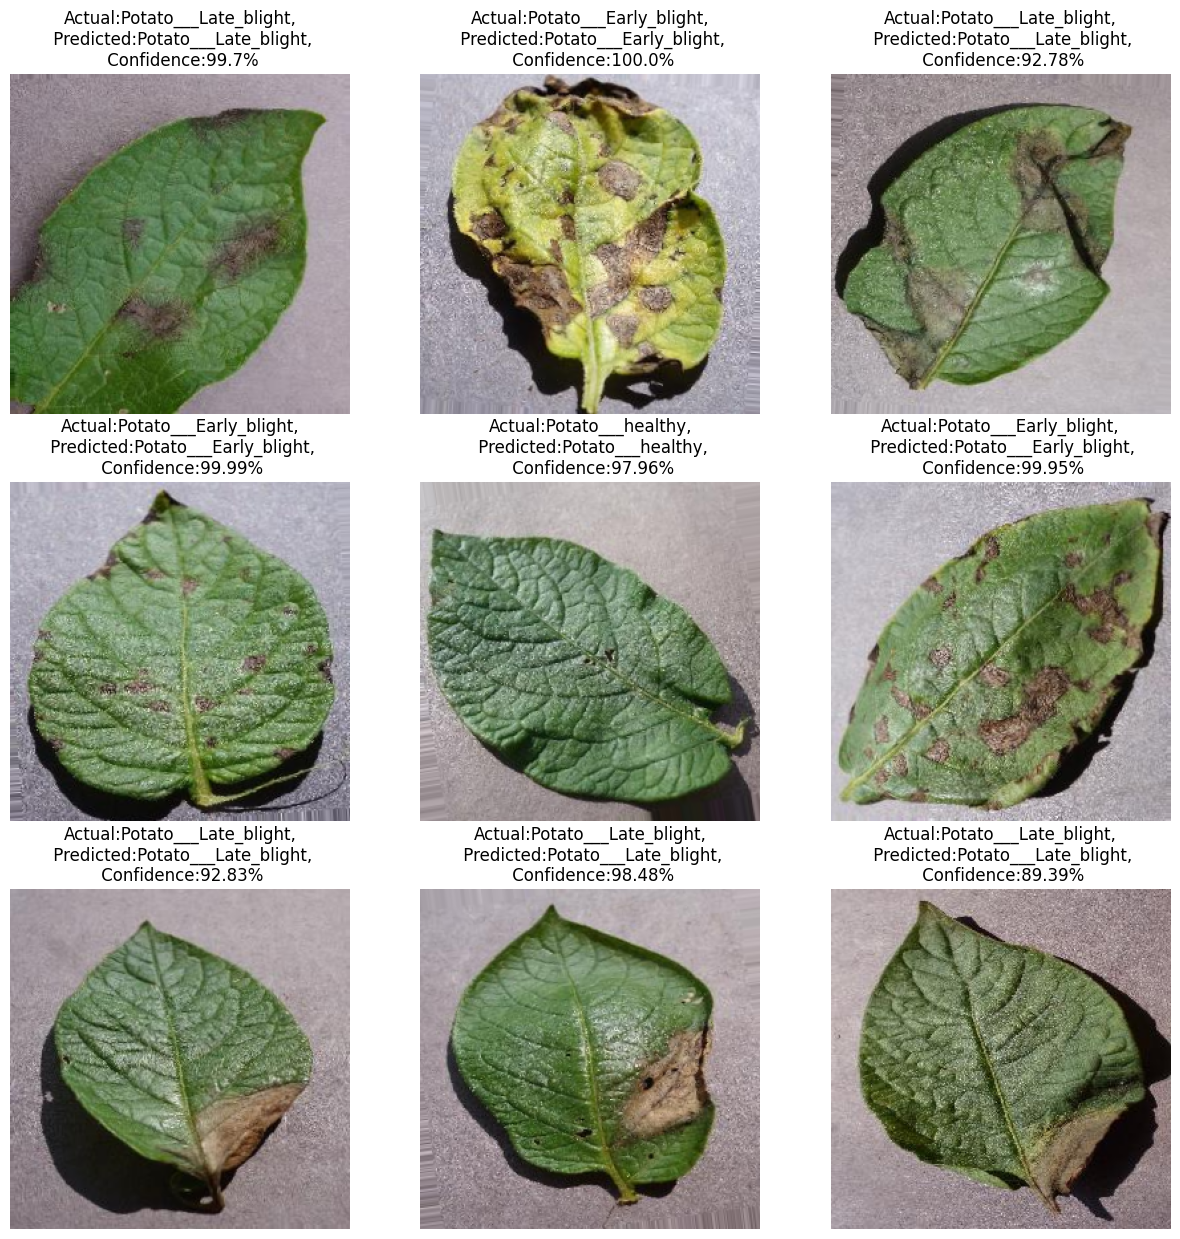

In [55]:
plt.figure(figsize=(15,15))
for images,labels in test_generator:
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        predicted_class,confidence=predict(model,images[i])   
        actual_class=class_names[int(labels[i])]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class},\n Confidence:{confidence}%")
        plt.axis("off")
        
    break    

In [56]:
#model_version=1
model.save("../potatoes.h5")

In [33]:
import os
os.listdir("../models")

['1']

In [34]:
[ int(i) for i in os.listdir("../models")]

[1]